<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN6440%20MODULE%204%20ASSIGNMENT%20B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import unittest
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler



In [5]:
# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Display basic info
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [15]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

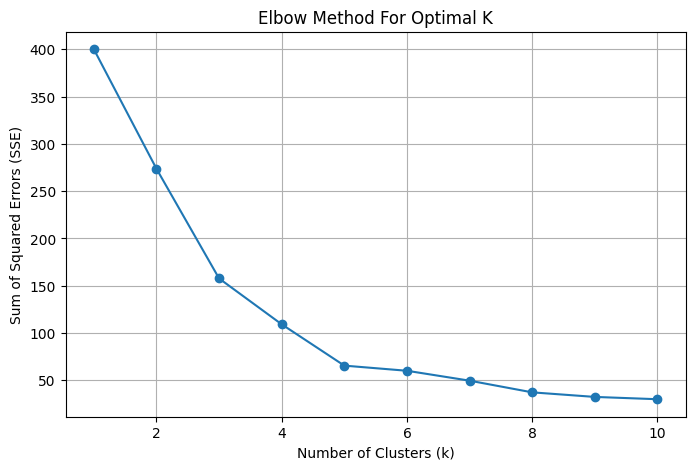

In [16]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

In [18]:
# Apply K-Means with the chosen number of clusters (from elbow method, say k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [19]:
# Add cluster labels to the original dataframe
df['Cluster'] = clusters


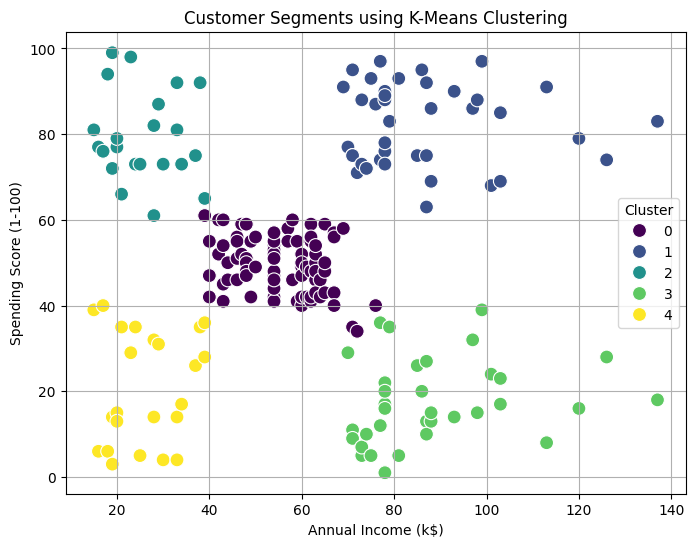

In [20]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [21]:
# Save clustered data
df.to_csv("Mall_Customers_Clustered.csv", index=False)
print("Clustered data saved to 'Mall_Customers_Clustered.csv'")

Clustered data saved to 'Mall_Customers_Clustered.csv'


In [24]:

class TestKMeansClustering(unittest.TestCase):

    def setUp(self):
        self.df = pd.DataFrame({
            'Annual Income (k$)': [15, 16, 17, 18, 100],
            'Spending Score (1-100)': [39, 81, 6, 77, 99]
        })

    def test_data_preprocessing(self):
        self.assertIn('Annual Income (k$)', self.df.columns)
        self.assertIn('Spending Score (1-100)', self.df.columns)

    def test_scaling(self):
        scaler = StandardScaler()
        scaled = scaler.fit_transform(self.df)
        self.assertEqual(scaled.shape[0], self.df.shape[0])

    def test_kmeans_clustering(self):
        scaler = StandardScaler()
        scaled = scaler.fit_transform(self.df)
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(scaled)
        self.assertEqual(len(labels), self.df.shape[0])
        self.assertTrue(set(labels).issubset({0, 1}))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False) # Changed 'exixt' to 'exit'


...
----------------------------------------------------------------------
Ran 3 tests in 0.024s

OK
